# 👩‍💻 두 변수의 연관 보기

In [1]:
setwd("C:/Users/eunee/khu_sda_2019/data")
load("demog_5var.RData")
attach(ndemog)

## ✔️ 막대 그림(bar plot)
### ◽ ```범주형 변수의 막대그림``` : 질적 변수의 시각화

#### 사례수를 보여주는 막대그림

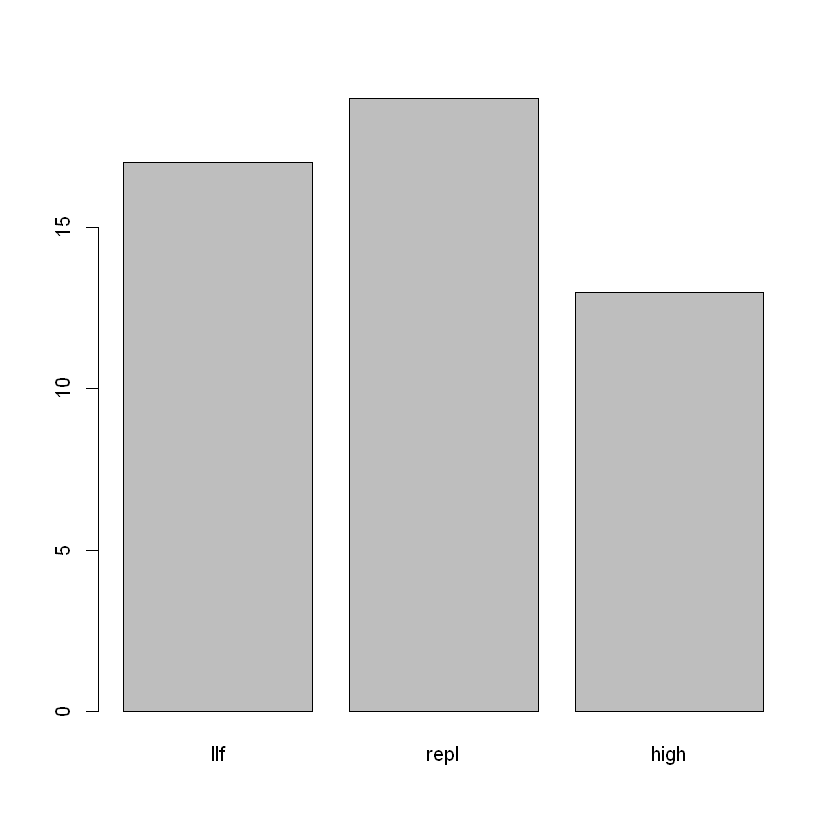

In [2]:
barplot(table(tfr_c))

```barplot``` 안에 ```table```을 활용해 **표를 만든 후 변수 이름을 넣는다.**   
x축에는 <u>범주의 이름</u>, y축에는 <u>사례수</u>가 나타난다.

#### 옵션을 넣은 막대그림

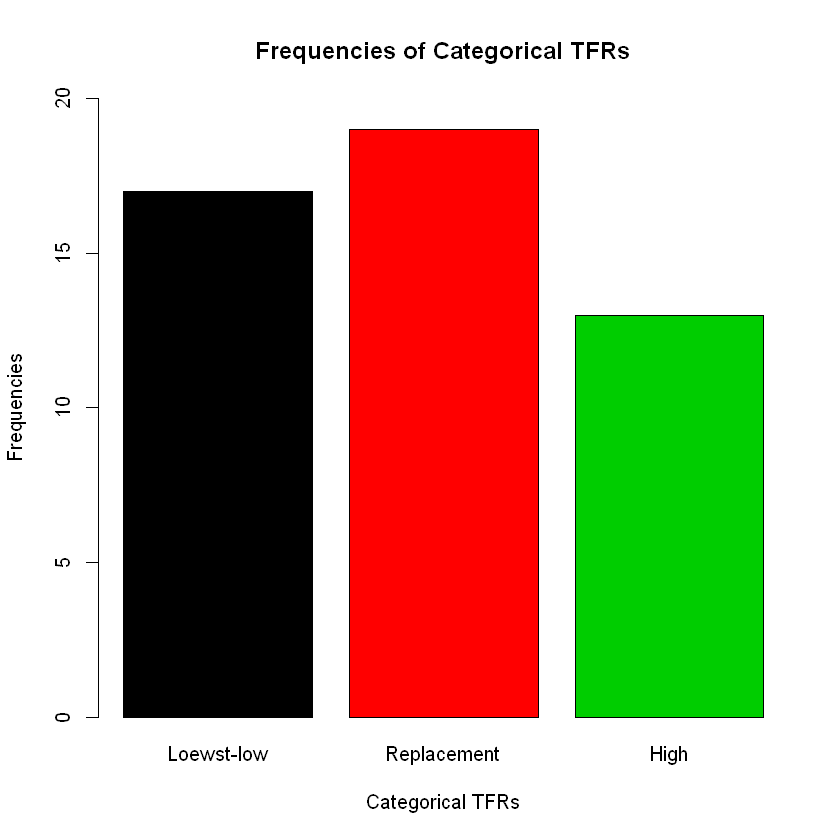

In [13]:
barplot(table(tfr_c), ylim = c(0,20), col = 1:3,
       xlab = "Categorical TFRs", ylab = "Frequencies",
       names.arg = c("Loewst-low", "Replacement", "High"),
       main = "Frequencies of Categorical TFRs")

- ```ylim``` : y축의 최댓값과 최솟값
- ```col``` : 막대의 색 (```col = c("black", "red", "green3")```와 같은 효과)
- ```xlab``` : x축의 이름
- ```ylab``` : y축의 이름
- ```names.arg``` : 각 막대의 이름
- ```main``` : 전체 그림의 이름

#### 그림 저장

In [22]:
jpeg(".＼＼graphs＼＼bar_tfr.jpg")
barplot(table(tfr_c), ylim = c(0,20),
       xlab = "Categorical TFRs", ylab = "Frequencies",
       names.arg = c("Loewest-low", "Replacement", "High"),
       main = "Frequencies of Categorical TFRs")
dev.off()

png 
  2

- ```.＼＼graphs＼＼bar_tfr.jpg``` : 현재 워킹 디렉토리 하위 ```graphs``` 폴더에 ```bar_tfr.jpg```로 저장
- ```dev.off``` : 그림 장치 종료

#### 비율을 보여주는 막대그림

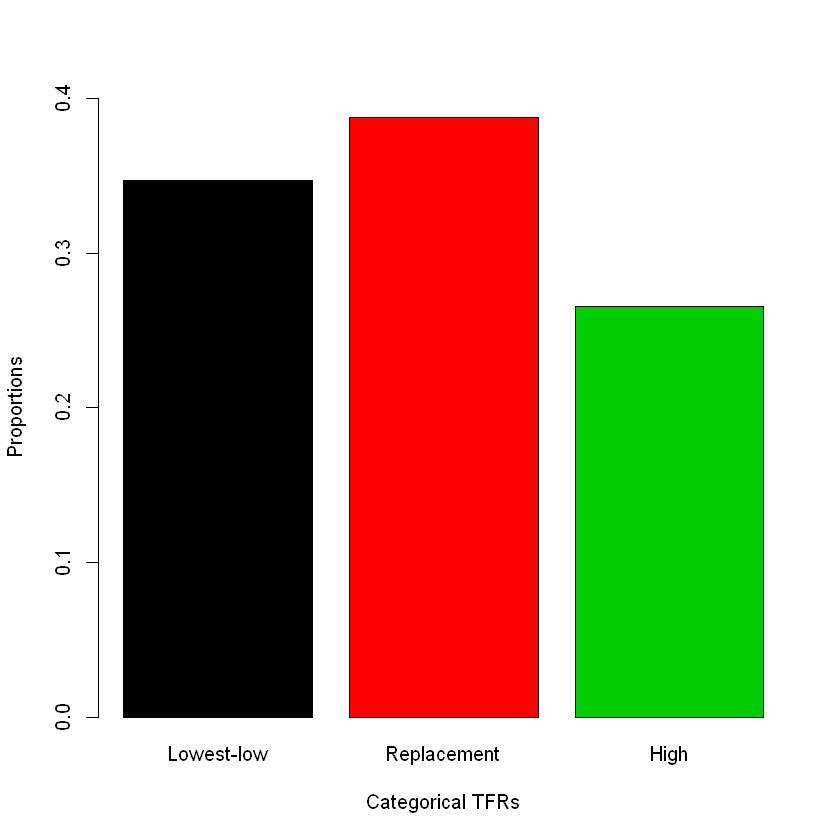

In [23]:
barplot(prop.table(table(tfr_c)),
       ylim = c(0, 0.4), col = 1:3,
       xlab = "Categorical TFRs", ylab = "Proportions",
       names.arg = c("Lowest-low", "Replacement", "High"))

```barplot``` 안에 <u>```prop.table```을 넣은 다음</u> ```table```을 넣어 실행한다.

#### 연도에 따른 출산율 막대그림

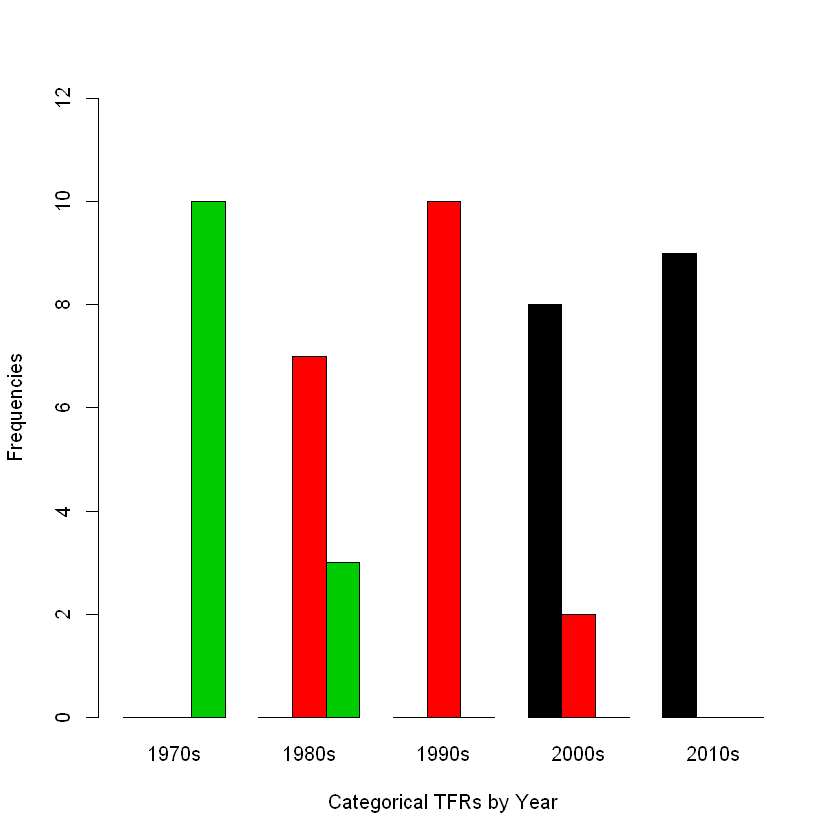

In [28]:
barplot(table(tfr_c, year_c), beside = TRUE,
       ylim = c(0, 12), col = 1:3,
       xlab = "Categorical TFRs by Year", ylab = "Frequencies",
       names.arg = c("1970s", "1980s", "1990s", "2000s", "2010s"))

- **종속변수, 설명변수** 순서로 작성한다. (```tfr_c``` 변수를 먼저 적고, ```year_c``` 변수를 나중에 적는다.)
- ```beside``` : 막대를 옆으로 그린다.

#### 비율과 이름을 넣은 막대그림

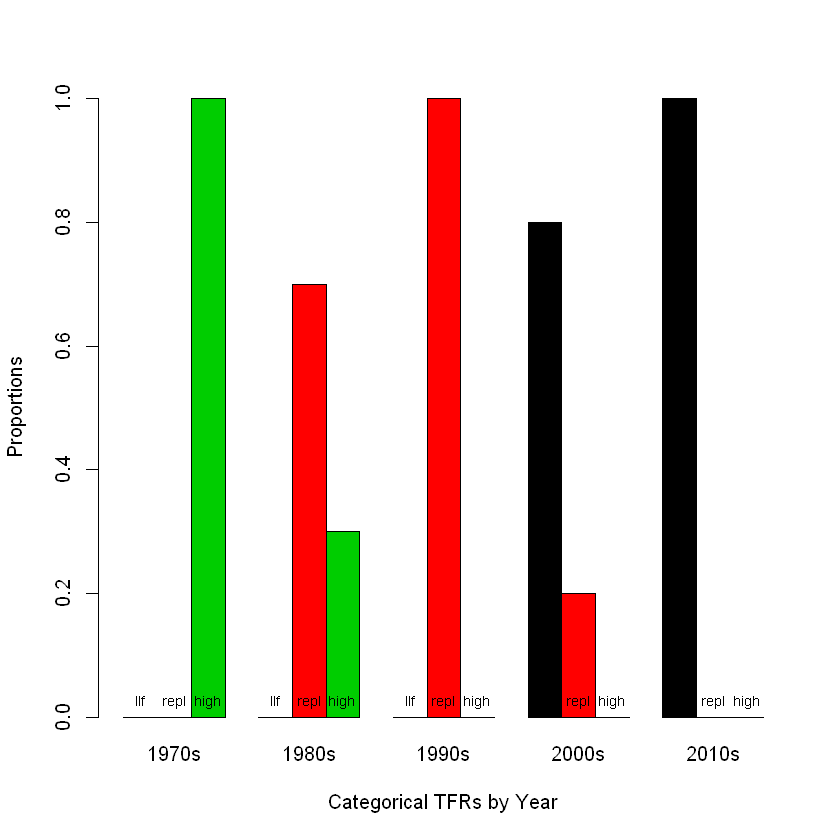

In [37]:
bp <- barplot(prop.table(table(tfr_c, year_c), margin = 2),
             beside = TRUE, ylim = c(0,1), col = 1:3,
             xlab = "Categorical TFRs by Year", ylab = "Proportions",
             names.arg= c("1970s", "1980s", "1990s", "2000s", "2010s"))

text(bp, 0, pos = 3, c("llf", "repl", "high"), cex = 0.7)

- ```margin```   
지정 안함 : 표 전체 합을 1로   
1 : 행의 합을 1로   
2 : 열의 합을 1로   
- 비율을 보여주는 막대그림을 그리면서 이들의 ```x축``` 값들을 ```bp``` 객체에 저장한다.

In [38]:
bp

1.5,5.5,9.5,13.5,17.5
2.5,6.5,10.5,14.5,18.5
3.5,7.5,11.5,15.5,19.5


- ```text``` : 글자가 들어갈 ```x축 값```, ```y축 값``` 의 좌표를 기준으로, ```pos``` 옵션에 따라 문자를 넣는다.
- ```pos```  
1 : 점 아래   
2 : 점 왼쪽   
3 : 점 위   
4 : 점 오른쪽
- ```cex``` : 원래 글자크기의 몇 배의 크기로 넣는지 설정

## ✔️ 히스토그램(histogram) : 양적 변수의 시각화
막대 그림 : 질적 변수의 분포    
히스토그램 : 양적 변수의 분포

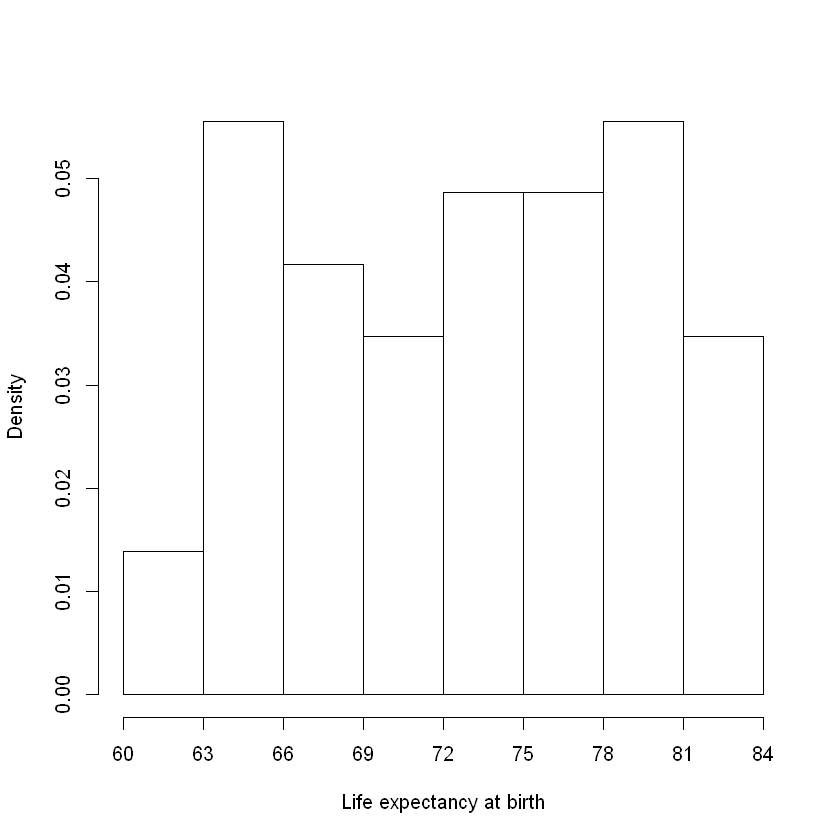

In [3]:
hist(le0, freq = FALSE, main = "",
    ylab = "Density", xlab = "Life expectancy at birth",
    breaks = c(60+0:8*3), xaxt = "n")

axis(side = 1, at = c(60+0:8*3))

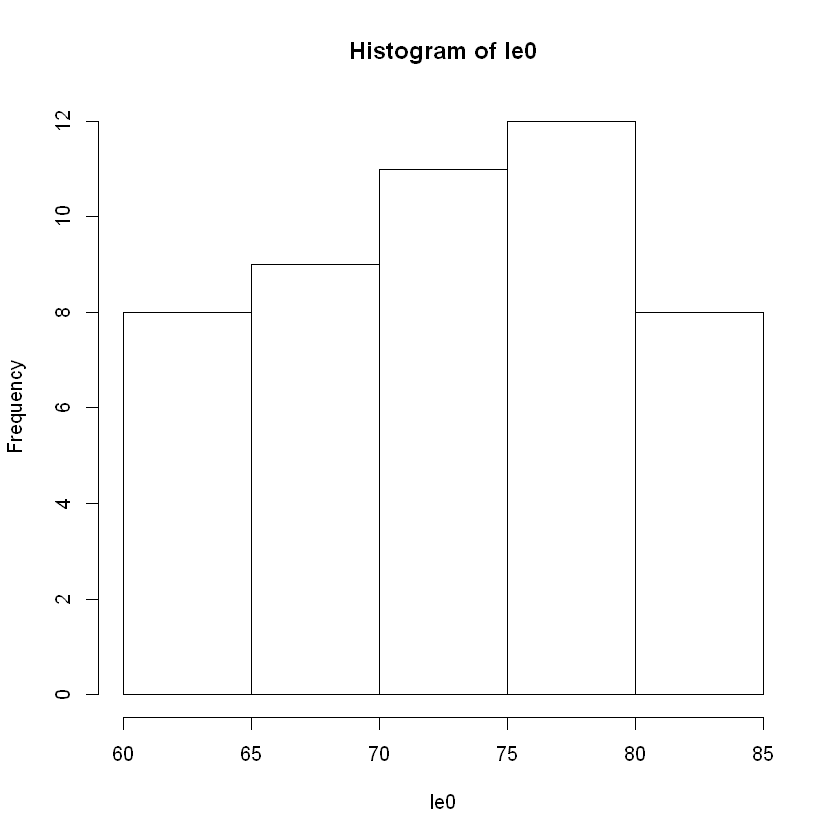

In [41]:
hist(le0)

- ```freq = FALSE``` : y축이 빈도수가 아닌 <u>확률밀도</u>가 되게 한다.
- ```main = ""``` : 제목에 아무것도 설정하지 않는다.
- ```breaks``` : x축의 단위 설정(60부터 3의 간격으로 84까지 그린다.)
- ```xaxt = "n"``` : x축을 아무것도 없는 상태로 둔다.
   
   
- ```side``` : ```pos```와 같은 위치
- ```at``` : x축에 값을 집어 넣을 점 설정 

#### 확률밀도 곡선을 덧붙이기
x축을 매우 잘게 자른 다음, 확률밀도를 부드러운 곡선으로 연결한다.

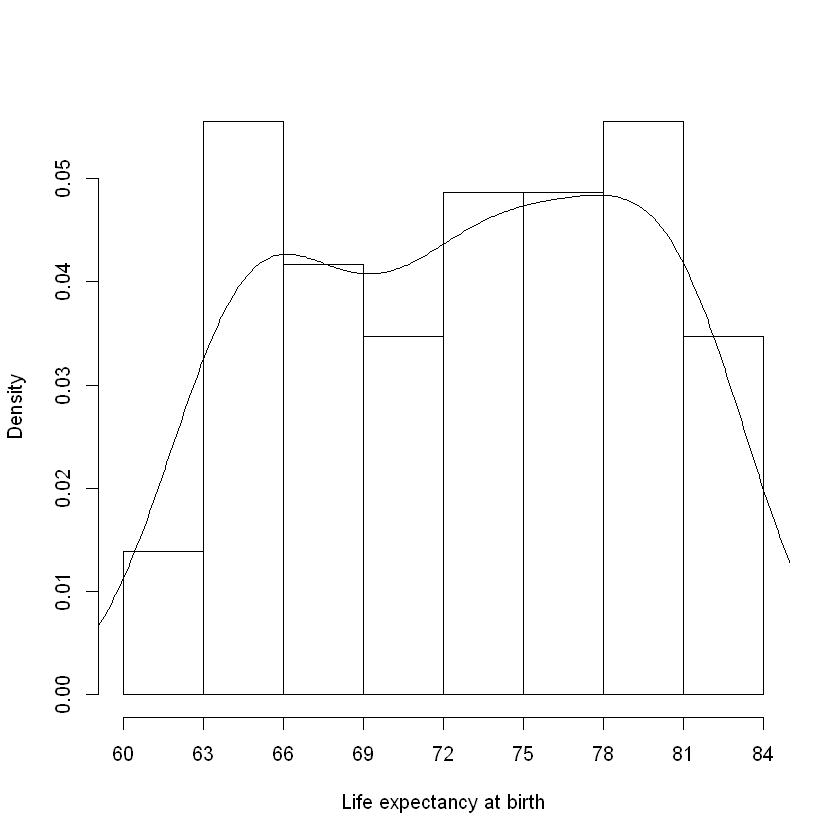

In [45]:
hist(le0, freq = FALSE, main = "",
    ylab = "Density", xlab = "Life expectancy at birth",
    breaks = c(60+0:8*3), xaxt = "n")

axis(side = 1, at = c(60+0:8*3))

lines(density(le0, na.rm = TRUE))

- ```lines``` : 이미 어떤 그림이 그려진 상태에서 선들을 <u>얹는다</u>.
- ```density``` : 확률밀도의 좌표 (```na.rm = TRUE``` : 결측치 제거)

#### 연대 변화에 따른 확률밀도 변화

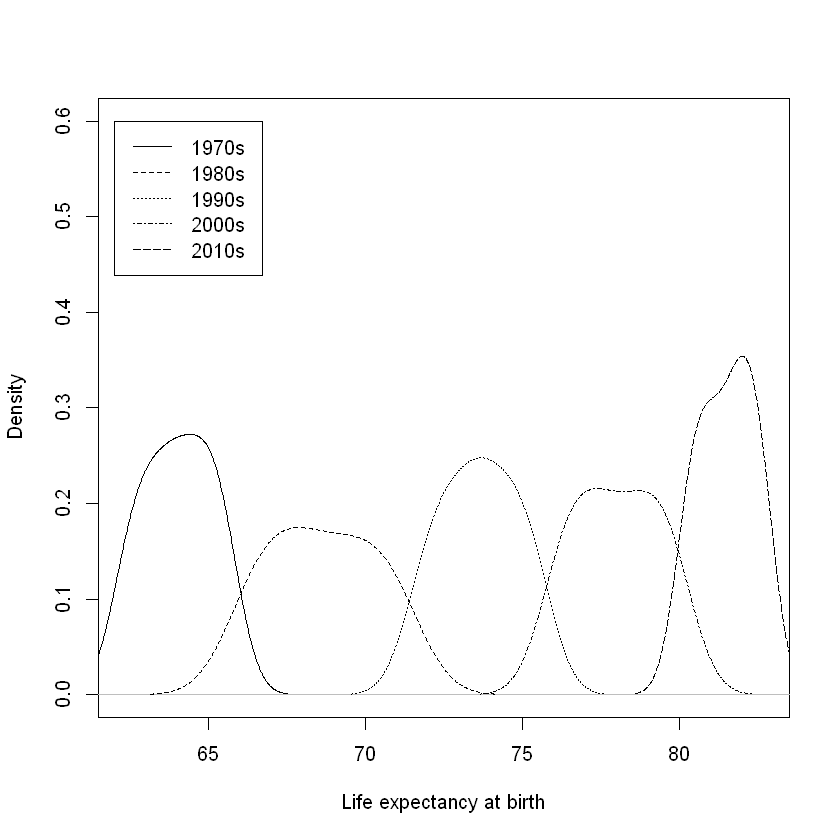

In [56]:
plot(density(le0[year_c == 0], na.rm = TRUE),
    main = "", xlab = "Life expectancy at birth", ylab = "Density",
    xlim = c(min(le0, na.rm = TRUE), max(le0, na.rm = TRUE)),
    ylim = c(0,0.6), lty = 1)

lines(density(le0[year_c == 1], na.rm = TRUE), lty = 2)
lines(density(le0[year_c == 2], na.rm = TRUE), lty = 3)
lines(density(le0[year_c == 3], na.rm = TRUE), lty = 4)
lines(density(le0[year_c == 4], na.rm = TRUE), lty = 5)

legend(62, 0.6, c("1970s", "1980s", "1990s", "2000s", "2010s"), lty = 1:5)

- ```year_c == 0``` : 1960년대의 확률밀도
- ```xlim```, ```ylim``` : x축과 y축의 최댓값과 최솟값 설정 (<u>범위를 미리 설정</u>할 필요). 특히 ```xlim```에서 함수를 사용해 최댓값과 최솟값을 설정한 부분에 주목하자.
- ```lty``` : 선의 유형 결정
- ```lwd``` : 선의 두께 결정
- ```legend``` : (```범례 시작 x축```, ```범례 시작 y축```, ```설명```)의 순으로 작성